#Introduction to Deep Learning 2023-2
## Cardiac Arrhythmia challenge

Steps to run notebook:
1. Create a copy of this folder in your drive
2. Run the first code block
3. Change 'data_path' to the location of the folder (open folder icon on the left, navigate to this folder, click the 3 dots on the right of the folder to copy path to the folder)







In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
# PATH TO THIS FOLDER IN DRIVE
data_path = "/content/gdrive/MyDrive/DeepLearning/Electrocardiograma_2023_2"

In [3]:
#data libraries
import numpy as np
import matplotlib.pyplot as plt
import h5py

#model libraries
!pip install tensorflow-addons
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import utils                                   # tools for creating one-hot encoding
from keras.utils import custom_object_scope
from keras.models import Sequential                        # Type of model we wish to use
from sklearn.metrics import confusion_matrix , precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 8.1 MB/s eta 0:00:00


# Extracting the Training Data
The training data is saved in the file 'training_set_500.h5', which is in [h5
format](https://fileinfo.com/extension/h5).  This format allows to save Hierarchical Data.  In this file we have saved the 'data' and the 'labels'

We extract the 'data' and the 'labels' to the variables X_train and y_train respectively and then convert these variable into numpy arrays.


Then we create the validation set with the function `train_test_split()` from sklearn , the data and the labels are in X_val and y_val respectively. Note that this process is made when X_train and y_train are already numpy arrays.

**The dataset has 3 labels :**

*   0: Normal
*   1: Arrhythmia
*   2: Noise




In [10]:
# Traing Data - ECG signals from 500 patients
dataset = h5py.File(data_path + '/training_set_500.h5', 'r')

X_train = dataset.get('data')
X_train = np.array(X_train)
y_train = dataset.get('labels')
y_train = np.array(y_train)
dataset.close()

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Healthy assertion

# The training data has 116953 1D ECG signals each one with 2049 samples,
# 93562 (80%) goes to training and 23391 (20%) for validation,

assert X_train.shape == (93562, 2049, 1)
assert X_val.shape == (23391, 2049, 1)

# 93562 labels for training (0: Normal, 1: Cardiac Arrhytmia, 2: Noise signal)
# 23391 labels for validation (0: Normal, 1: Cardiac Arrhytmia, 2: Noise signal)

assert y_train.shape == (93562, 1)
assert y_val.shape == (23391, 1)

## Converting the y_train and y_val to one-hot encoding

In [5]:
nclases = 3
y_train = utils.to_categorical(y_train,nclases)
print("y_train= ", y_train[0])

y_val = utils.to_categorical(y_val,nclases)
print("y_val = ", y_val[0])
# Healthy assertion
# 116953 labels ([1. 0. 0.]: Normal, [0. 1. 0.]: Cardiac Arrhytmia, [0. 0. 1.]: Noise signal)
assert y_train.shape == (93562, 3)
assert y_val.shape == (23391, 3)

y_train=  [0. 0. 1.]
y_val =  [0. 0. 1.]


## Sketching some ECG Signal

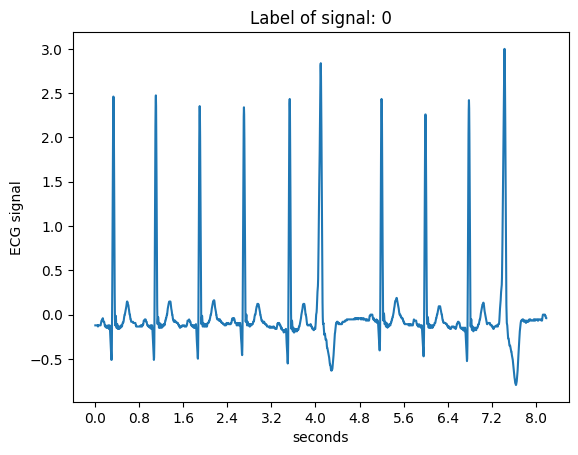

In [ ]:

index = 763

x=np.arange(0,2048,200)
xi = x/250 # sample rate of recording: 250Hz
plt.xticks(x,xi)
plt.plot(X_train[index])
plt.title('Label of signal: %i'  % np.argmax(y_train[index]))
plt.xlabel('seconds')
plt.ylabel('ECG signal')

plt.show()

# Extracting the Test Data Given by Professor
The test data is saved in the file '/test_without_labels_200.h5', which is also in [h5
format](https://fileinfo.com/extension/h5).  
We extract the 'data' to the variable X_test. **Please note that the test labels  are hidden for challenge purposes.**

In [ ]:
# Testing Data - ECG signals from 200 patients
dataset = h5py.File(data_path + '/test_without_labels_200.h5', 'r')

X_test = dataset.get('data')
X_test = np.array(X_test)
dataset.close()

# Healthy assertion
assert X_test.shape == (46943, 2049, 1) # 46943 1D ECG signal each one with 2049 samples

#Models

## Model 1: The given

This model were given in the course Colab, so i test it

In [ ]:
# MODEL copy + paste from Keras.io

model1 = keras.Sequential(
    [
        layers.Dense(200, activation="relu", name="layer1", input_shape = (2049,)),
        layers.Dense(50, activation="relu", name="layer2"),
        layers.Dense(nclases, name="layer3",activation='softmax'),
    ]
)

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 200)               410000    
                                                                 
 layer2 (Dense)              (None, 50)                10050     
                                                                 
 layer3 (Dense)              (None, 3)                 153       
                                                                 
Total params: 420203 (1.60 MB)
Trainable params: 420203 (1.60 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# COMPILE
model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#FIT
model1.fit(X_train, y_train, epochs= 5, validation_split=0.2, batch_size=32, verbose = 1)

Epoch 1/5
2340/2340 [==============================] - 19s 6ms/step - loss: 0.6944 - accuracy: 0.6932 - val_loss: 0.6589 - val_accuracy: 0.7137
Epoch 2/5
2340/2340 [==============================] - 10s 4ms/step - loss: 0.6066 - accuracy: 0.7376 - val_loss: 0.6468 - val_accuracy: 0.7154
Epoch 3/5
2340/2340 [==============================] - 9s 4ms/step - loss: 0.5435 - accuracy: 0.7635 - val_loss: 0.6353 - val_accuracy: 0.7325
Epoch 4/5
2340/2340 [==============================] - 10s 4ms/step - loss: 0.4788 - accuracy: 0.7911 - val_loss: 0.6606 - val_accuracy: 0.7305
Epoch 5/5
2340/2340 [==============================] - 14s 6ms/step - loss: 0.4217 - accuracy: 0.8194 - val_loss: 0.7058 - val_accuracy: 0.7270


## Model 2: The Convolutional Neural Network

CNNs are the preferred architecture for classifying ECG signals due to their ability to handle temporal and spatial information, efficiently extract features, be robust to noise and artifacts, be efficiently trained and inferred, and their proven track record. These characteristics make them ideal for our ECG classification tasks.


**The evidence supports the use of CNNs to Arrhythmia Detection**

CNNs have achieved state-of-the-art performance in ECG arrhythmia detection, surpassing traditional methods in terms of accuracy, sensitivity, and specificity.

Various CNN architectures, including 1D convolutional layers, residual networks, and attention mechanisms, have demonstrated successful application in arrhythmia detection tasks.

**Jafar, M. A., Ahmed, A. N., & Al-Khalifa, K. S. (2023). Heartbeat Classification and Arrhythmia Detection Using a Multi-Model Deep-Learning Technique. Healthcare, 11(7), 1859.**

In [6]:
def build_cnn(input_shape):
  """Construir una red neuronal convolucional 1D para clasificar señales cardiacas."""

  model = tf.keras.Sequential([
      tf.keras.layers.Input(input_shape),
      tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu'),
      tf.keras.layers.MaxPool1D(pool_size=2),
      tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
      tf.keras.layers.MaxPool1D(pool_size=2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(3, activation='softmax')
  ])

  return model


model_cnn = build_cnn((2049, 1))
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2047, 32)          128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 1023, 32)          0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 1021, 64)          6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 510, 64)           0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 32640)             0         
                                                                 
 dense (Dense)               (None, 128)               4

In [7]:
# COMPILE
model_cnn.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [9]:
# FIT
model_cnn.fit(X_train, y_train, epochs=10, batch_size=32, verbose = 1)

Epoch 1/10
2924/2924 [==============================] - 430s 147ms/step - loss: 0.3529 - accuracy: 0.8643
Epoch 2/10
2924/2924 [==============================] - 431s 147ms/step - loss: 0.2736 - accuracy: 0.8930
Epoch 3/10
2924/2924 [==============================] - 407s 139ms/step - loss: 0.1951 - accuracy: 0.9245
Epoch 4/10
2924/2924 [==============================] - 404s 138ms/step - loss: 0.1231 - accuracy: 0.9539
Epoch 5/10
2924/2924 [==============================] - 405s 139ms/step - loss: 0.0724 - accuracy: 0.9742
Epoch 6/10
2924/2924 [==============================] - 433s 148ms/step - loss: 0.0430 - accuracy: 0.9852
Epoch 7/10
2924/2924 [==============================] - 395s 135ms/step - loss: 0.0315 - accuracy: 0.9892
Epoch 8/10
2924/2924 [==============================] - 396s 136ms/step - loss: 0.0245 - accuracy: 0.9920
Epoch 9/10
2924/2924 [==============================] - 387s 132ms/step - loss: 0.0220 - accuracy: 0.9927
Epoch 10/10
2924/2924 [=======================

## Model 3: CNN with normalized data


In the last CNN a slight Overfitting was found ,to avoid that  we normalize the ECG data with Min-Max scaler because
1. Reduces feature variance: Min-Max scaling rescales all features to
a common range, typically between 0 and 1. This reduces the variance of features with large magnitudes, preventing them from dominating the model training process. This is particularly useful for ECG data, where certain leads might have significantly higher amplitudes compared to others. By scaling them down, the model learns to focus on the relative relationships between features instead of absolute values, leading to a more robust and generalizable model.

2. Improves gradient descent convergence: Min-Max scaling ensures that all features have similar ranges, which improves the efficiency of gradient descent optimization algorithms. These algorithms update the model parameters based on the gradient of the loss function. When features have drastically different magnitudes, the gradients can become unstable and prone to large fluctuations, making it difficult for the optimizer to converge to a good solution. Min-Max scaling avoids these issues by making the optimization process smoother and more efficient, leading to better model performance.

3. Reduces sensitivity to outliers: Outliers in ECG data can significantly impact the training process and lead to overfitting. Min-Max scaling compresses the data range, reducing the impact of outliers and making the model less sensitive to their presence. This is particularly beneficial for small datasets, where outliers can have a disproportionate influence on the model's learning process.



**Data Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def normalize_data(data):
  # Calculate mean and standard deviation across all samples
  mean = np.mean(data, axis=0)
  std = np.std(data, axis=0)

  # Normalize the data using z-score
  normalized_data = (data - mean) / std

  return normalized_data

X_train_normalized = normalize_data(X_train)
#Healty assert
assert X_train.shape == X_train_normalized.shape

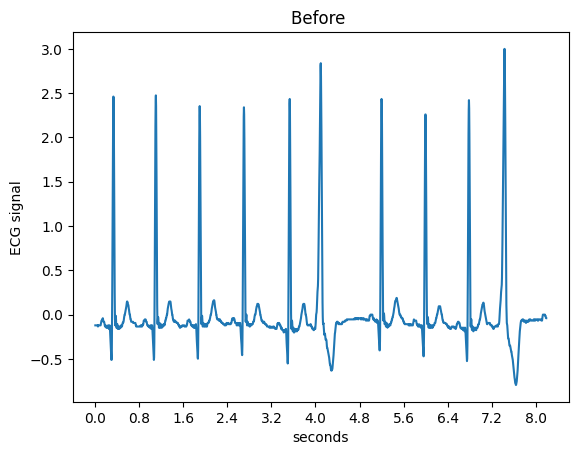

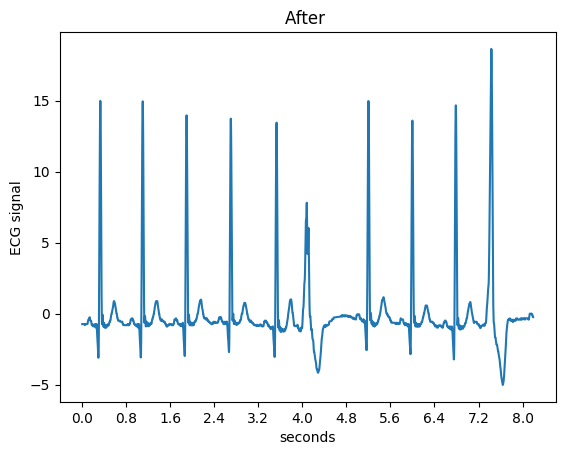

In [ ]:

index = 763

x=np.arange(0,2048,200)
xi = x/250 # sample rate of recording: 250Hz
plt.xticks(x,xi)
plt.plot(X_train[index])
plt.title('Before '  % np.argmax(y_train[index]))
plt.xlabel('seconds')
plt.ylabel('ECG signal')

plt.show()

x=np.arange(0,2048,200)
xi = x/250 # sample rate of recording: 250Hz
plt.xticks(x,xi)
plt.plot(X_train_normalized[index])
plt.title('After '  % np.argmax(y_train[index]))
plt.xlabel('seconds')
plt.ylabel('ECG signal')

plt.show()

In [ ]:
model_cnn_normalized = build_cnn((2049, 1))
model_cnn_normalized.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 2047, 32)          128       
                                                                 
 max_pooling1d_12 (MaxPooli  (None, 1023, 32)          0         
 ng1D)                                                           
                                                                 
 conv1d_13 (Conv1D)          (None, 1021, 64)          6208      
                                                                 
 max_pooling1d_13 (MaxPooli  (None, 510, 64)           0         
 ng1D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 32640)             0         
                                                                 
 dense_12 (Dense)            (None, 128)              

In [ ]:
# Compile the model
model_cnn_normalized.compile(
    loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"]
)

In [ ]:
#Fit the model
model_cnn_normalized.fit( X_train_normalized, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
2924/2924 [==============================] - 22s 7ms/step - loss: 0.4373 - accuracy: 0.8336
Epoch 2/10
2924/2924 [==============================] - 20s 7ms/step - loss: 0.3222 - accuracy: 0.8736
Epoch 3/10
2924/2924 [==============================] - 20s 7ms/step - loss: 0.2494 - accuracy: 0.9036
Epoch 4/10
2924/2924 [==============================] - 20s 7ms/step - loss: 0.1710 - accuracy: 0.9352
Epoch 5/10
2924/2924 [==============================] - 20s 7ms/step - loss: 0.1030 - accuracy: 0.9621
Epoch 6/10
2924/2924 [==============================] - 20s 7ms/step - loss: 0.0573 - accuracy: 0.9800
Epoch 7/10
2924/2924 [==============================] - 20s 7ms/step - loss: 0.0379 - accuracy: 0.9873
Epoch 8/10
2924/2924 [==============================] - 20s 7ms/step - loss: 0.0297 - accuracy: 0.9904
Epoch 9/10
2924/2924 [==============================] - 20s 7ms/step - loss: 0.0232 - accuracy: 0.9927
Epoch 10/10
2924/2924 [==============================] - 20s 7ms/step - l

## Model 4: With Regularizers



In [ ]:
def build_cnn_optimized(input_shape):
  # Define the CNN model with regularization techniques
  model_cnn_optimized = Sequential([
      tf.keras.layers.Input(shape=input_shape),
      tf.keras.layers.Conv1D(32, kernel_size=3, activation="relu", kernel_regularizer="l2"),
      tf.keras.layers.MaxPooling1D(pool_size=2),
      tf.keras.layers.Conv1D(64, kernel_size=3, activation="relu", kernel_regularizer="l2"),
      tf.keras.layers.MaxPooling1D(pool_size=2),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation="relu", kernel_regularizer="l2"),
      tf.keras.layers.Dropout(0.2),  # Add a Dropout layer before the output layer
      tf.keras.layers.Dense(3, activation="softmax")
  ])
  return model_cnn_optimized
model_cnn_optimized = build_cnn_optimized((2049, 1))
model_cnn_optimized.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 2047, 32)          128       
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 1023, 32)          0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 1021, 64)          6208      
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 510, 64)           0         
 g1D)                                                            
                                                                 
 dropout (Dropout)           (None, 510, 64)           0         
                                                                 
 flatten_2 (Flatten)         (None, 32640)            

In [ ]:
# Compile the model
model_cnn_optimized.compile(
    loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"]
)

In [ ]:
#Fit the model
model_cnn_optimized.fit( X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
2924/2924 [==============================] - 24s 7ms/step - loss: 0.7603 - accuracy: 0.7681
Epoch 2/10
2924/2924 [==============================] - 22s 8ms/step - loss: 0.6691 - accuracy: 0.7945
Epoch 3/10
2924/2924 [==============================] - 27s 9ms/step - loss: 0.6354 - accuracy: 0.8060
Epoch 4/10
2924/2924 [==============================] - 29s 10ms/step - loss: 0.6191 - accuracy: 0.8094
Epoch 5/10
2924/2924 [==============================] - 27s 9ms/step - loss: 0.6069 - accuracy: 0.8115
Epoch 6/10
2924/2924 [==============================] - 22s 7ms/step - loss: 0.5988 - accuracy: 0.8141
Epoch 7/10
2924/2924 [==============================] - 22s 8ms/step - loss: 0.5945 - accuracy: 0.8165
Epoch 8/10
2924/2924 [==============================] - 21s 7ms/step - loss: 0.5892 - accuracy: 0.8183
Epoch 9/10
2924/2924 [==============================] - 21s 7ms/step - loss: 0.5845 - accuracy: 0.8215
Epoch 10/10
2924/2924 [==============================] - 22s 8ms/step - 

## Model 5: More Complex CNN

After Regularization the problem of overfitting is resolved, however the model is uncapable of generalize features and have an accuracy over 90%, the strategy will be improve the model to have more extraction and add 5% more to training data.

The normalization of data in the same model, performs worst, in this case the original data will be not normalized.



In [ ]:
def build_cnn_deeper(input_shape):

  model = tf.keras.Sequential([
      tf.keras.layers.Input(input_shape),
      tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPool1D(pool_size=2),
      tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPool1D(pool_size=2),
      tf.keras.layers.Conv1D(128, kernel_size=3, activation='relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPool1D(pool_size=2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(3, activation='softmax')
  ])
  return model
model_cnn_deeper = build_cnn_deeper((2049, 1))
model_cnn_deeper.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2047, 32)          128       
                                                                 
 batch_normalization (Batch  (None, 2047, 32)          128       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 1023, 32)          0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 1021, 64)          6208      
                                                                 
 batch_normalization_1 (Bat  (None, 1021, 64)          256       
 chNormalization)                                                
                                                        

In [ ]:
model_cnn_deeper.compile(
        loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
    )

In [ ]:
# Early stopping to prevent overfitting
epochs = 100
batch_size = 32

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

# Model training
history = model_cnn_deeper.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=32,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1,
)

Epoch 1/100
2632/2632 [==============================] - ETA: 0s - loss: 0.2105 - accuracy: 0.9227

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2632/2632 [==============================] - 41s 16ms/step - loss: 0.2105 - accuracy: 0.9227 - val_loss: 0.1689 - val_accuracy: 0.9490 - lr: 0.0010
Epoch 2/100
2632/2632 [==============================] - 41s 16ms/step - loss: 0.1912 - accuracy: 0.9299 - val_loss: 0.2435 - val_accuracy: 0.9037 - lr: 0.0010
Epoch 3/100
2632/2632 [==============================] - 41s 16ms/step - loss: 0.1732 - accuracy: 0.9374 - val_loss: 0.1788 - val_accuracy: 0.9367 - lr: 0.0010
Epoch 4/100
2632/2632 [==============================] - 41s 16ms/step - loss: 0.1643 - accuracy: 0.9412 - val_loss: 0.1785 - val_accuracy: 0.9345 - lr: 0.0010
Epoch 5/100
2632/2632 [==============================] - 41s 16ms/step - loss: 0.1480 - accuracy: 0.9474 - val_loss: 0.2950 - val_accuracy: 0.8855 - lr: 0.0010
Epoch 6/100
2632/2632 [==============================] - 41s 15ms/step - loss: 0.1436 - accuracy: 0.9496 - val_loss: 0.2128 - val_accuracy: 0.9358 - lr: 0.0010
Epoch 7/100
2632/2632 [=============================

# Evaluate the models on the X_validation sample



In [ ]:
y_val = np.argmax(y_val, axis=1)
y_val

array([2, 1, 2, ..., 2, 2, 2])

In [ ]:
def evaluate_model(model,X_val,y_val):
  # Make predictions on validation set
  y_pred = model.predict(X_val)
  y_pred = (y_pred == y_pred.max(axis=1)[:,None]).astype(int)

  y_predictions = np.zeros(shape=(y_pred.shape[0], 1))

  for i in range(y_pred.shape[0]):
    y_predictions[i] = np.asarray(np.where(y_pred[i] == 1))

  # Calculate F1 score , precision and recall for each class
  accuracy = accuracy_score(y_val, y_predictions)
  f1_scores = f1_score(y_val, y_predictions, average=None)
  precision = precision_score(y_val, y_predictions, average='weighted')
  recall = recall_score(y_val, y_predictions, average='weighted')

  # Calculate mean and standard deviation of F1 scores
  mean_f1 = np.mean(f1_scores)
  std_f1 = np.std(f1_scores)

  # Print results
  print(f"Accuracy: {accuracy:.4f}")
  print(f"Precision: {precision:.4f}")
  print(f"Recall: {recall:.4f}")
  print(f"Mean F1 score: {mean_f1:.4f}")
  print(f"Standard deviation of F1 score: {std_f1:.4f}")


## Model 1

In [ ]:
evaluate_model(model1,X_val, y_val)

731/731 [==============================] - 1s 2ms/step
Accuracy: 0.7845
Precision: 0.7855
Recall: 0.7845
Mean F1 score: 0.6031
Standard deviation of F1 score: 0.2715


## Model CNN

In [ ]:
evaluate_model(model_cnn,X_val, y_val)

731/731 [==============================] - 2s 3ms/step
Accuracy: 0.8595
Precision: 0.8560
Recall: 0.8595
Mean F1 score: 0.7078
Standard deviation of F1 score: 0.2379


## Same Model CNN with normalized data

In [ ]:
X_val_normalized = normalize_data(X_val)
evaluate_model(model_cnn_normalized,X_val_normalized, y_val)

731/731 [==============================] - 2s 3ms/step
Accuracy: 0.8503
Precision: 0.8497
Recall: 0.8503
Mean F1 score: 0.7121
Standard deviation of F1 score: 0.2195


## Optimized CNN

In [ ]:
evaluate_model(model_cnn_optimized,X_val, y_val)

731/731 [==============================] - 2s 2ms/step
Accuracy: 0.8354
Precision: 0.8057
Recall: 0.8354
Mean F1 score: 0.5660
Standard deviation of F1 score: 0.4004


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Deeper CNN Model

In [ ]:
evaluate_model(model_cnn_deeper,X_val,y_val)

731/731 [==============================] - 3s 4ms/step
Accuracy: 0.8847
Precision: 0.8832
Recall: 0.8847
Mean F1 score: 0.7675
Standard deviation of F1 score: 0.1794


# Calculate the predictions on the X_test, save and submit the results

When you are satisfied with your results:

*   Calculate y_pred, which is the prediction for the X_test
*   Save it on a .npy file
*   Submit your results on the Classroom

I will sent you the F1 score on this file.

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred == y_pred.max(axis=1)[:,None]).astype(int)
assert y_pred.shape == (46943,3)

1467/1467 [==============================] - 4s 2ms/step


In [ ]:
#FILE FOR SUBMISSION
np.save(data_path + '/Carlos_Fajardo_prediction',y_pred)

**Do not edit the code below, it is for testing results**

In [ ]:
# dataset_test = h5py.File(data_path + '/test_with_labels_200.h5', 'r')
# y_test = dataset_test.get('labels')
# y_test = np.array(y_test)
# assert y_test.shape == (46943, 1)

# from sklearn.metrics import accuracy_score
# y_predictions = np.zeros(shape=(y_pred.shape[0], 1))

# for i in range(y_pred.shape[0]):
#   y_predictions[i] = np.asarray(np.where(y_pred[i] == 1))

# test_accuracy = accuracy_score(y_test, y_predictions)
# print(test_accuracy)